In [1]:
# data source: https://www.kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset

# Data pre-processing (dataset cleaning)

In [2]:
import pandas as pd
import joblib
import re
from difflib import SequenceMatcher
df = pd.read_csv('ds.csv').drop('FILENAME', axis = 1)

In [3]:
df2 = df
df2.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [4]:
# Keep ONLY the cleanest structural features
ultra_safe_features = [
    'URLLength',
    'DomainLength',
    'TLD',
    'TLDLength',
    'NoOfSubDomain',
    'LetterRatioInURL',
    'label'
]

## Preprocessing: letter ratio in URL

In [5]:
def recalculate_letter_ratio(dom):
    d = str(dom)
    letter_only = re.findall(r'[a-zA-Z]+', d)
    ratio = SequenceMatcher(a="".join(letter_only), b=dom).ratio()
    return ratio

df2['LetterRatioInURL'] = df['URL'].apply(recalculate_letter_ratio)
df2

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [6]:
from sklearn.preprocessing import LabelEncoder
df_usf = df[ultra_safe_features]
# import newly processed data
# source: https://huggingface.co/datasets/ealvaradob/phishing-dataset
# processed from JSON. properties extracted to match selected features
new_data = pd.read_csv('new_data.csv', index_col = 0)
df2 = pd.concat([df_usf, new_data])


In [7]:
le = LabelEncoder()
df2['TLD'] = le.fit_transform(df2[['TLD']])

C:\Users\tanyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df2

,URLLength,DomainLength,TLD,TLDLength,NoOfSubDomain,LetterRatioInURL,label
0,31,24,966,3,1,0.915254,1
1,23,16,1027,2,1,0.857143,1
2,29,22,1772,2,2,0.888889,1
3,26,19,966,3,1,0.897959,1
4,33,26,1525,3,1,0.920635,1
...,...,...,...,...,...,...,...
835688,28,20,966,3,1,0.947368,1
835690,24,16,1623,2,1,0.608696,0
835692,33,25,966,3,1,0.958333,1
835694,58,50,966,3,2,0.936170,1


# Model training

NOTE: More data are used for this dataset instead of the PhiUSIIL dataset, which includes a source from Hugging Face. The processing step of the said dataset can be found under `data_reorganize_dataset` and the CSV-processed version can be found on `new_data.csv`.

In [9]:
X_clean = df2.drop('label', axis = 1)
y = df2['label']

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create the scaler instance
scaler = StandardScaler()

# Create the model
model = RandomForestClassifier()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.1, stratify=y, random_state=42
)

# Fit the scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(accuracy)

0.8586766465228994


In [33]:
y_pred = model.predict(X_test)
# When retraining, add this validation
from sklearn.metrics import classification_report, confusion_matrix
from extended_sklearn_metrics import final_model_evaluation, print_evaluation_summary
# After training
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save both scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'trained_model.pkl')

# evaluation summary
final_model_evaluation(X_test=X_test_scaled, y_test=y_test, model=model, X_train=X_train_scaled, y_train=y_train)

C:\Users\tanyu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.87     36527
           1       0.79      0.92      0.85     28671

    accuracy                           0.86     65198
   macro avg       0.86      0.86      0.86     65198
weighted avg       0.87      0.86      0.86     65198

Confusion Matrix:
[[29739  6788]
 [ 2426 26245]]


{'task_type': 'classification',
 'train_size': 586773,
 'test_size': 65198,
 'n_features': 6,
 'feature_names': ['feature_0',
  'feature_1',
  'feature_2',
  'feature_3',
  'feature_4',
  'feature_5'],
 'performance': {'accuracy': 0.8586766465228994,
  'precision_macro': 0.8595424623518402,
  'recall_macro': 0.8647748740136476,
  'f1_macro': 0.8582696035552329,
  'precision_weighted': 0.8673786940939574,
  'recall_weighted': 0.8586766465228994,
  'f1_weighted': 0.8591848094951268,
  'roc_auc': 0.9440091744174964,
  'class_distribution': {np.int64(0): np.int64(36527),
   np.int64(1): np.int64(28671)}},
 'cv_stability': {'accuracy': {'mean': np.float64(0.8565612281969341),
   'std': np.float64(0.001008702977845882),
   'min': np.float64(0.8546205956286481),
   'max': np.float64(0.8574484039743),
   'cv': np.float64(0.001177619234493262)},
  'precision_macro': {'mean': np.float64(0.8573001328517635),
   'std': np.float64(0.0010085180016058566),
   'min': np.float64(0.8553717858108592),
  

In [11]:
X_clean.columns

Index(['URLLength', 'DomainLength', 'TLD', 'TLDLength', 'NoOfSubDomain',
       'LetterRatioInURL'],
      dtype='object')

In [12]:
# NOTE: there is no need to use Selenium for parsing it - just use the data above
# DomainLength			whole domain length after http / https (if removed)
# TLD					TLD of the domain which can be extracted from the last string of the domain if splitted
# NoOfSubDomain			subdomain count (split "." then minus 2 - example: play.google.com = 1)
# LetterRatioInURL		
# label					target (0 = phishing, 1 = legitimate)
#
# workflow: validate domain, extract TLD / NoOfSubdomain, pass data to model

In [13]:
# save trained model
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

# Data analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

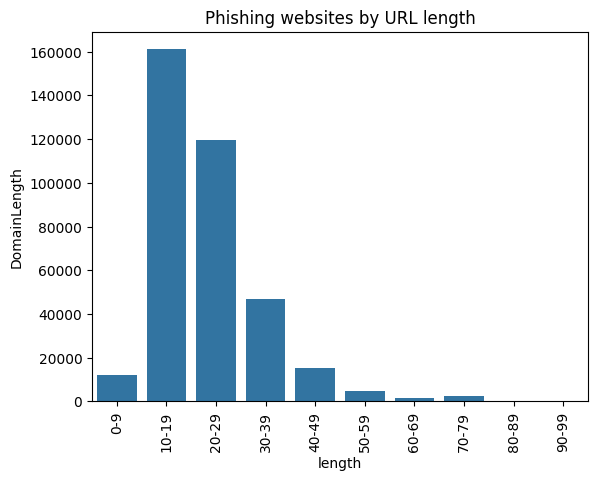

In [15]:
df2['DomainLength'].unique()
def group_by_range(n):
    if n < 100:
        # Calculate the range start
        range_start = (n // 10) * 10
        range_end = range_start + 9
        return f"{range_start}-{range_end}"
        
df3 = df2.copy()
df3['length'] = df3['DomainLength'].apply(group_by_range)


# Reorder the DataFrame
df_ordered_phishing = df3[df3['label'] == 0][['DomainLength', 'length']].groupby('length')['DomainLength'].count().reset_index()
df_ordered_legitimate = df3[df3['label'] == 1][['DomainLength', 'length']].groupby('length')['DomainLength'].count().reset_index()
sns.barplot(df_ordered_phishing, x = 'length', y = 'DomainLength')
plt.xticks(rotation=90)
plt.title('Phishing websites by URL length')
plt.show

Note that most websites are less than 50 characters. To view a more detailed plot, "less than 50" and "50-99" must be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

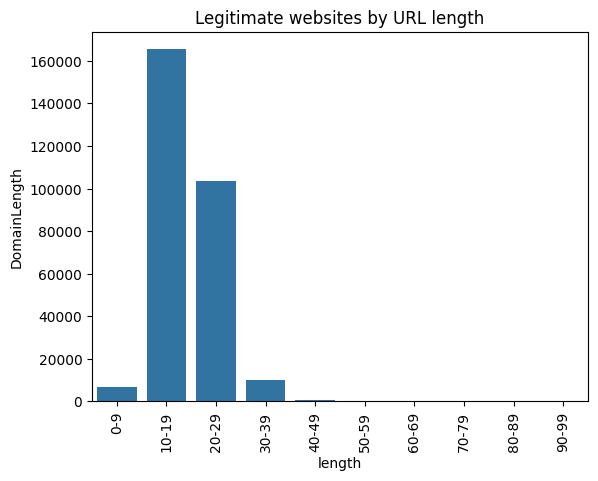

In [16]:
sns.barplot(df_ordered_legitimate, x = 'length', y = 'DomainLength')
plt.xticks(rotation=90)
plt.title('Legitimate websites by URL length')
plt.show

For legitimate websites, the maximum character for a website is only in the 50 character to 99 character range. Note that the TLD is also another significant point for phishing websites.

In [17]:
source = df2.TLD
target = le.inverse_transform(df2.TLD)

In [18]:
df3['TLD'] = df3.TLD.apply(lambda x: target[x])

In [19]:
df3[df3.label == 1]['TLD'].value_counts()

TLD
com         258381
eu            5539
tk            4460
co            2810
app           2542
             ...  
download         1
eus              1
fm               1
my               1
dk               1
Name: count, Length: 88, dtype: int64

In [20]:
df3[df3.label == 0]['TLD'].value_counts()

TLD
com       248179
eu         30744
io         14433
uk         11072
net         8192
           ...  
cyou           1
128            1
review         1
tz             1
am             1
Name: count, Length: 129, dtype: int64

For both phishing and non-phishing websites, .io, .com and .org are the most used.

Some domains are only used for legitimate websites, such as .gov, .edu (which requires special approval from the related NIC, according to domain registration knowledge). But since some websites are easily hijacked, there **IS** a possibility of special approval-only websites to host phishing content, such as easily-hijacked government sites bearing the .gov domain.

In [21]:
set1 = set(df3[df3.label == 0]['TLD']) # phishing
set2 = set(df3[df3.label == 1]['TLD']) # legitimate

print('From the dataset, these TLDs appears only on phishing sites')
print(list(set1 - set2))
print('From the dataset, these TLDs does not appear as phishing sites')
print(list(set2 - set1))

From the dataset, these TLDs appears only on phishing sites
['cyou', 'media', 'is', 'lu', 'win', 'network', 'asia', 'gq', 'ee', 'ug', 'su', '123', 'ir', 'ro', 'games', 'travel', 'qa', 'tokyo', 'ph', 'cool', 'az', 'be', 'hu', 'pm', 'today', 'uy', 'life', 'hk', 'sh', 'shop', 'guru', 'am', 'ng', 'tz', '128', 'eg', 'im', 'review', 'one', 'bar', 'lk', 'cc', 'sk', 'art', 'pt', 'space', 'online']
From the dataset, these TLDs does not appear as phishing sites
['ae', 'fm', 'bt', 'download', 'news', 'sa']


NOTABLE DOMAINS USED FOR PHISHING VALUES:
* .today - Although there are some legitimate uses of this domain (example: archive.today, a well-known alternative for the Wayback Machine for website archiving), it is needed to be cautious since some websites might be registered as phishing sites or there might be cases of hijacking.
* .bar - Usage unclear, but according to top websites that uses this TLD, the domain is usually used as a proxy for illicit sites (mostly gambling), which is considered phishing.
* .ng - Nigeria country TLD. According to NIRA, some domains are open for people with intention to use it. Top websites under this TLD are usually used by Nigerian news sites, but it is needed to be cautious since some websites might be registered as phishing sites or there might be cases of hijacking.
* .review - According to data, the top websites that utilizes this TLD includes "content farms".
* .guru - Although there are a few legitimate uses of this TLD, most uses are usually focused on "content farms" and proxies for illicit sites (gambling and streaming).
* .sk - Slovakia country TLD. According to SK-NIC, there are no registration requirements for this domain. Most websites under this domain are legitimate websites (example: yadi.sk for Yandex's cloud storage service) but phishing sites might be a result of hijacked websites that uses this TLD.

NOTE: other domains not listed here exists on both phishing and legitimate datasets.

(Sources: https://domaintyper.com/ (for top 10 ranking to identify legitimate use), Wikipedia pages of the TLD)

# Gradio demonstration

In [22]:
df3.columns

Index(['URLLength', 'DomainLength', 'TLD', 'TLDLength', 'NoOfSubDomain',
       'LetterRatioInURL', 'label', 'length'],
      dtype='object')

In [23]:
import numpy as np
# rewrite get_data and link to gradio
def predict_data(Domain):
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('trained_model.pkl')
    domain = Domain.replace('http://', '').replace('https://', '') # removes regular HTTP / HTTPS protocol for domain parsing
    dom_length = len(domain)
    tld = domain.split('.')[-1]
    try:
        tld_encoded = le.transform([tld])[0]
    except:
        return "Invalid domain"
    tld_length = len(tld)
    subdomain_no = len(domain.split('.')) - 2
    letter_ratio = SequenceMatcher(a = "".join(re.findall(r'[a-zA-Z.]+', domain)), b = domain).ratio()
    input_features = np.array([[
        len(Domain),           # URLLength
        dom_length,         # DomainLength  
        tld_encoded,        # TLD (encoded)
        tld_length,         # TLDLength
        subdomain_no,       # NoOfSubDomain
        letter_ratio        # LetterRatioInURL
    ]])
    scaled_features = scaler.transform(input_features)
    prediction = model.predict(scaled_features)
    prediction_proba = model.predict_proba(scaled_features)
    try:
        return f"{"Legitimate" if (prediction == 1) else "Phishing"}"
    except:
        return "Invalid domain"

import gradio as gr
demo = gr.Interface(fn=predict_data, inputs="text", outputs="label")
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
